### Graduate School Project Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from CountryMappings import getCountries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

In [2]:
print(os.listdir())
df_success = pd.read_excel('doc_successful.xlsx')
df_unsuccess = pd.read_excel('doc_unsuccessful.xlsx')

['.git', '.gitignore', '.ipynb_checkpoints', '.Rhistory', 'CountryMappings.py', 'current_dataset.csv', 'data_010820.csv', 'data_020320.csv', 'data_020320_cleaned', 'doc_successful.xlsx', 'doc_unsuccessful.xlsx', 'Graduate School Project .ipynb', 'Graduate-School-Project', 'Individual+School+Analysis.xlsx', 'Initial Data Analysis.ipynb', 'Patch Notes.docx', 'phd.R', 'project.Rproj', 'README.md', 'Some cleaning.ipynb', '__pycache__']


## Initial Data Cleaning

### Merging Columns
The two datasets no not have the same columns

In [3]:
print("Successful Data has", len(df_success.columns), "columns")
print("Unsuccessful Data has", len(df_unsuccess.columns), "columns")

print("\nColumns in Successful Data but not in Unsuccessful Data:", list(set(df_success) - set(df_unsuccess)))

print("\nColumns in Unsuccessful Data but not in Successful Data:", list(set(df_unsuccess) - set(df_success)))

Successful Data has 47 columns
Unsuccessful Data has 45 columns

Columns in Successful Data but not in Unsuccessful Data: ['Prep Level', 'Time to PhD Degree', 'AWARD_CATEGORY_DESC', 'Average Precol GPA']

Columns in Unsuccessful Data but not in Successful Data: ['DEGREE_AWARD_CATEGORY_DESC', 'Avg Previous College GPA']


Dealing with "AWARD_CATEGORY_DESC" and "DEGREE_AWARD_CATEGORY_DESC"

In [4]:
print("Number of Unique values in DEGREE_AWARD_CATEGORY_DESC:", df_unsuccess["DEGREE_AWARD_CATEGORY_DESC"].nunique())
print("Unique Value: ", df_unsuccess["DEGREE_AWARD_CATEGORY_DESC"][1])

print("\nNumber of Unique values in AWARD_CATEGORY_DESC:", df_success["AWARD_CATEGORY_DESC"].nunique())
print("Unique Value: ", df_success["AWARD_CATEGORY_DESC"][1])

Number of Unique values in DEGREE_AWARD_CATEGORY_DESC: 1
Unique Value:  Doctoral Degree

Number of Unique values in AWARD_CATEGORY_DESC: 1
Unique Value:  Doctoral Degree


Since this column provides no information, we delete it.

In [5]:
df_success = df_success.drop(columns = "AWARD_CATEGORY_DESC")
df_unsuccess = df_unsuccess.drop(columns = "DEGREE_AWARD_CATEGORY_DESC")

Dealing with "Time to PhD Degree" - We will delete this column

In [6]:
df_success["Time to PhD Degree"].head()

0    5.0
1    NaN
2    6.0
3    5.0
4    NaN
Name: Time to PhD Degree, dtype: float64

In [7]:
df_success.drop(columns = "Time to PhD Degree", inplace = True)

Dealing with Prep Level - We will add NaN and "absorb it" when we consoladate all previous information with PCA

In [8]:
df_unsuccess["Prep Level"] = np.nan

Dealing with "Average Precol GPA" and "Avg Previous College GPA"

In [9]:
df_unsuccess.rename(columns = {"Avg Previous College GPA" : "Average Precol GPA" }, inplace = True)

Values are the same, column names are different. 

Looking at our two datasets again:

In [10]:
print("Successful Data has", len(df_success.columns), "columns")
print("Unsuccessful Data has", len(df_unsuccess.columns), "columns")

print("\nColumns in Successful Data but not in Unsuccessful Data:", list(set(df_success) - set(df_unsuccess)))

print("\nColumns in Unsuccessful Data but not in Successful Data:", list(set(df_unsuccess) - set(df_success)))

Successful Data has 45 columns
Unsuccessful Data has 45 columns

Columns in Successful Data but not in Unsuccessful Data: []

Columns in Unsuccessful Data but not in Successful Data: []


Adding a response Column Y and Merging the two together: 

In [11]:
df_success['Y'] = 1
df_unsuccess['Y'] = 0
df = pd.concat([df_success, df_unsuccess], ignore_index=True, sort=True)

In [12]:
print("Data Shape: ", df.shape)
print("Number of Positives: ",df[df['Y']==1].shape[0])
print("Number of Negatives: ", df[df['Y']==0].shape[0])

Data Shape:  (2470, 46)
Number of Positives:  1530
Number of Negatives:  940


## Consolidating Columns

#### Race

We will consolidate all information presented in columns CITIZENSHIP_DESC, Intl Nation of Citizenship, American Indian, Asian, Black or African American, White, Hawaiian or Pacific Islander, Hispanic or Latino, Unknown Race Ethnicity together.

In [13]:
print("Values for International Citizenship", df["Intl Nation of Citizenship"].nunique())

Values for International Citizenship 78


In [14]:
print("Vales for Citizen Field ", df["CITIZENSHIP_DESC"].unique())

Vales for Citizen Field  ['Citizen' 'Non-Citizen' 'Elig NonCtzn Res Alien Prm Res']


We would like to merge the two fields together.

In [15]:
df.loc[df["CITIZENSHIP_DESC"] == 'Citizen'] #all rows where Citizenship = Noncitizen

,1st Term Funding,2nd Term Funding,3rd Term Funding,4th Term Funding,Academic Period Matriculated,Age at Matriculation,American Indian,Asian,Average Precol GPA,Black or African American,...,Term 4 GPA,Term 5 GPA,Term 6 GPA,Term 7 GPA,Term 8 GPA,Total Charges,Total Funding Amount,Unknown Race Ethnicity,White,Y
0,4685.0,4935.0,4110.0,432.0,201320,22.3,NaN,NaN,3.510000,NaN,...,0.000000,0.0,0.0,0.000000,0.0,20406.46,16859.0,NaN,White,1
1,NaN,NaN,NaN,NaN,201320,25.3,NaN,NaN,2.975000,Black or African American,...,2.890000,3.4,0.0,3.657143,NaN,20191.50,NaN,NaN,NaN,1
2,4685.0,4685.0,3699.0,3699.0,201290,22.0,NaN,Asian,3.490000,NaN,...,3.275000,3.0,3.0,0.000000,0.0,32939.51,27262.0,NaN,NaN,1
3,4685.0,4685.0,3699.0,3699.0,201290,23.0,NaN,NaN,4.005000,NaN,...,3.850000,4.0,4.0,0.000000,0.0,32054.70,26356.0,NaN,White,1
5,4685.0,8340.0,6885.0,6885.0,201290,21.0,NaN,NaN,3.110000,NaN,...,3.666667,0.0,0.0,NaN,NaN,35807.70,28477.0,NaN,White,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,NaN,NaN,NaN,NaN,201890,32.0,NaN,Asian,3.680000,NaN,...,NaN,NaN,NaN,NaN,NaN,1762.00,NaN,NaN,NaN,0
2465,11325.0,11325.0,NaN,NaN,201890,23.0,NaN,NaN,3.780000,NaN,...,NaN,NaN,NaN,NaN,NaN,24755.00,22650.0,NaN,White,0
2466,NaN,NaN,NaN,NaN,201860,24.7,NaN,NaN,4.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,3881.20,NaN,NaN,White,0
2467,NaN,NaN,NaN,NaN,201890,26.0,NaN,NaN,3.756667,Black or African American,...,NaN,NaN,NaN,NaN,NaN,21377.00,NaN,NaN,NaN,0


In [16]:
df.loc[df["CITIZENSHIP_DESC"] != 'Non-Citizen',"Intl Nation of Citizenship"] = "US"

In [17]:
df["Intl Nation of Citizenship"].head()

0           US
1           US
2           US
3           US
4    Hong Kong
Name: Intl Nation of Citizenship, dtype: object

We now find the 5 largest catagories.

In [18]:
df["Intl Nation of Citizenship"].value_counts().head()

US                   1525
China                 333
India                 120
Turkey                 80
Korea Republic Of      61
Name: Intl Nation of Citizenship, dtype: int64

In [19]:
largest_categories = ['US','China','India']

In [20]:
countries_to_continent = getCountries()
df_temp = df.copy()
countries = df["Intl Nation of Citizenship"].unique()
for country in countries:
    try:
        if country not in largest_categories:
            continent = list(filter(lambda c: c['name'] == country, countries_to_continent))[0]["continent"]
            df.loc[df["Intl Nation of Citizenship"] == country,'Intl Nation of Citizenship'] = continent 
    except: 
        pass
print("Values for Citizenship", df["Intl Nation of Citizenship"].nunique())

Values for Citizenship 14


In [21]:
print("Values before",df["Intl Nation of Citizenship"].unique())
df.loc[df["Intl Nation of Citizenship"] == "Occupied Palestinian Territory","Intl Nation of Citizenship"] = "Asia"
df.loc[df["Intl Nation of Citizenship"] == "Korea Republic Of","Intl Nation of Citizenship"] = "Asia"
df.loc[df["Intl Nation of Citizenship"] == "Cote dIvoire","Intl Nation of Citizenship"] = "Afria"
df.loc[df["Intl Nation of Citizenship"] == "Oceania","Intl Nation of Citizenship"] = "Asia"
df.loc[df["Intl Nation of Citizenship"] == "Christmas Island","Intl Nation of Citizenship"] = "Asia"
df.loc[df["Intl Nation of Citizenship"] == "Netherlands","Intl Nation of Citizenship"] = "Europe"
print("Values", df["Intl Nation of Citizenship"].unique())

Values before ['US' 'Asia' 'China' 'Africa' 'India' 'Occupied Palestinian Territory'
 'Europe' 'South America' 'Korea Republic Of' 'Cote dIvoire'
 'North America' 'Oceania' 'Christmas Island' 'Netherlands']
Values ['US' 'Asia' 'China' 'Africa' 'India' 'Europe' 'South America' 'Afria'
 'North America']


In [22]:
df = df.drop(columns = "CITIZENSHIP_DESC")
df.rename(columns = {"Intl Nation of Citizenship" : "Citizenship" }, inplace = True)

In [23]:
df["Race"] = np.nan
df.Race.fillna(df.Asian, inplace=True)
df.Race.fillna(df["Black or African American"], inplace=True)
df.Race.fillna(df["American Indian"], inplace=True)
df.Race.fillna(df["White"], inplace=True)
df.Race.fillna(df["Hawaiian or Pacific Islander"], inplace=True)
df.Race.fillna(df["Hispanic or Latino"], inplace=True)
df.Race.fillna(df["Unknown Race Ethnicity"], inplace=True)

In [24]:
del df["Black or African American"]
del df["American Indian"]
del df["White"]
del df["Hawaiian or Pacific Islander"]
del df["Hispanic or Latino"]
del df["Unknown Race Ethnicity"]
del df["Asian"]

In [25]:
print(df.shape)

(2470, 39)


In [26]:
df['Citizenship'] = np.where(df['Citizenship']=='US',df['Race'],df['Citizenship'])

In [27]:
del df['Race']

### Replacing Nans

In [28]:
df.iloc[:,0:4].fillna(0, inplace = True)

### Use PCA for Application Strength

In [37]:
features = ['GMAT Score',
       'GRE Analytical Writing Score', 'GRE Quantitative Score',
       'GRE Revised General Quant Score', 'GRE Revised General Verbal Score',
       'GRE Revised General Write Score', 'GRE Verbal Score','Average Precol GPA']
x = df.loc[:, features]
x.fillna(x.mean(),inplace=True)
m = x.values

(2470, 8)


Text(0, 0.5, '% of Variance Explained')

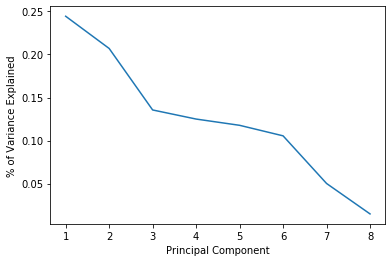

In [38]:
# features = ['GMAT Score',
#        'GRE Analytical Writing Score', 'GRE Quantitative Score',
#        'GRE Revised General Quant Score', 'GRE Revised General Verbal Score',
#        'GRE Revised General Write Score', 'GRE Verbal Score','Average Precol GPA']
# x = df.loc[:, features].values
# x = np.nan_to_num(x) 
m = StandardScaler().fit_transform(m)
pca = PCA()
principalComponents = pca.fit_transform(m)

print(principalComponents.shape)
var = pca.explained_variance_ratio_
plt.plot(range(1,9),var)
plt.xlabel('Principal Component')
plt.ylabel('% of Variance Explained')

In [43]:
np.round(pca.components_[0:3,:],3)

array([[ 0.011,  0.286, -0.181,  0.595,  0.632,  0.214,  0.241,  0.169],
       [-0.024, -0.597,  0.275,  0.338,  0.309, -0.017, -0.556, -0.221],
       [ 0.139,  0.155, -0.246,  0.194,  0.035, -0.71 ,  0.098, -0.586]])

We will use first three Components

In [46]:
pc_df = pd.DataFrame()
pc_df["PC1"] = principalComponents[:,0]
pc_df["PC2"] = principalComponents[:,1]
pc_df["PC3"] = principalComponents[:,2]

In [48]:
pc_df.to_csv('pc_components.csv',index=False)

In [31]:
print(df.shape)

(2470, 33)


# Summary
-  Started with two data sets with different colummns
-  To make columns same, deleted "Degree" since it only contained a single value, changed the name of 2 columns and added zeros to a column
    -  QUESTION: How to deal with "years to degree" for unsuccessful students? - make it 0 or a large value?
    -  UPDATE: Deleted the column
-  Merged the Citizenship column together into a "Regions" field, indicating which continent the student is from.
-  Merged the multiple Race fields into a single column
    -  UPDATE: Added China, US and India as different columns, and merged race for all US students
-  Subbed out NaN's with zeros in columns that made sense. 
-  QUESTION: There is 8 different GPA fields, for up to 8 years of GPA but not all fields are filled. Furthermore, some observations go from GPA -> 0 -> GPA. How to handle.
-  Used PCA to summarize each student's application strength. From Skree Plot, decided to use first three PCs

In [32]:
df.to_csv('current_dataset.csv', index = False)